# Homework 'Regression Model'

Importing relevant libraties

In [1]:
import pandas as pd
import mplcursors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [2]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('action.csv')

In [3]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('action.csv')

# Drop any rows with missing values in the target column
df.dropna(subset=['gross(in $)'], inplace=True)

# Extract the movies with non-zero gross income
df = df[df['gross(in $)'] != 0]

# Initialize empty lists for X and y
X = []
y = []

# Iterate over rating values from 0.1 to 10 with a step of 0.1
for rating in np.arange(0.1, 10.1, 0.1):

    # Select the top 10 movies with the current rating
    df_sampled = df[df['rating'] == rating].nlargest(10, 'gross(in $)')

    # Append the 'rating' and 'gross(in $)' columns to X and y lists
    X.append(df_sampled['rating'].tolist())
    y.append(df_sampled['gross(in $)'].tolist())

# Flatten X and y lists
X = np.concatenate(X)
y = np.concatenate(y)

# Reshape X array to have two dimensions
X = X.reshape(-1, 1)

# Impute missing values in the input data using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create a linear regression model and train it on the imputed data
model = LinearRegression()
model.fit(X_imputed, y)

# Generate predictions using the trained model
y_pred = model.predict(X_imputed)

# Calculate the R-squared value of the model
r_squared = model.score(X_imputed, y)
print('R-squared:', round(r_squared, 2))

R-squared: 0.37


*ChatGPT*: R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that can be explained by the independent variable(s) in a regression model.

An R-squared value of 0.37 means that approximately 37% of the variation in the dependent variable can be explained by the independent variable(s) in the model. The remaining 63% of the variation is unexplained and may be due to other factors not included in the model, measurement error, or randomness.

In general, a higher R-squared value indicates a better fit of the model to the data, but the interpretation of what constitutes a "good" R-squared value can depend on the context and the nature of the data being analyzed.

*Nikolai (+ChatGPT)*: I am trying to understand the relationship between the rating of a film, which is an indicator of its quality (let's assume so), and the gross box office, which is a measure of the total amount of money earned by the film. Based on this analysis, **there is not a strong relationship between these two variables**.

This means that a film's box office success is not necessarily a strong indicator of its quality. It's possible for a movie to do well at the box office even if it's not highly rated by critics or audiences. Similarly, a movie that is highly rated may not necessarily be a box office hit.

It's important to note that correlation does not necessarily imply causation. Just because there is not a strong correlation between a movie's rating and its box office performance, it doesn't mean that one doesn't affect the other in some way. Other factors, such as marketing, budget, and star power, may also play a role in a movie's box office success.

## Making a plot:

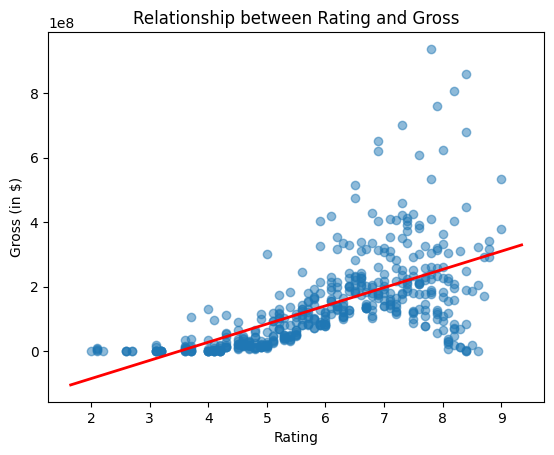

In [4]:
# Create a scatter plot of rating vs. gross
fig, ax = plt.subplots()
ax.scatter(X_imputed[:,0], y, alpha=0.5)

# Plot the linear regression line on top of the scatter plot
slope = model.coef_
intercept = model.intercept_
x_vals = np.array(ax.get_xlim())
y_vals = intercept + slope * x_vals
ax.plot(x_vals, y_vals, color='red', linewidth=2)

# Set the x-axis label and y-axis label
ax.set_xlabel('Rating')
ax.set_ylabel('Gross (in $)')

# Set the title of the plot
ax.set_title('Relationship between Rating and Gross')

# Create a cursor to display movie names on hover
movie_name = df['movie_name']
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect('add', lambda sel: sel.annotation.set_text(movie_name[sel.target.index]))

# Display the plot
plt.show()